In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt 

# DATA EXPLORATION

In [2]:
conn = sqlite3.connect('../data/raw/td_V2.db')
commits = pd.read_sql_query("SELECT * FROM GIT_COMMITS",conn)
commits_changes = pd.read_sql_query("SELECT * FROM GIT_COMMITS_CHANGES",conn)
faults = pd.read_sql_query("SELECT * FROM SZZ_FAULT_INDUCING_COMMITS",conn)
refactoring = pd.read_sql_query("SELECT * FROM REFACTORING_MINER",conn)

## GIT_COMMITS

In [3]:
commits.head(3)

,PROJECT_ID,COMMIT_HASH,COMMIT_MESSAGE,AUTHOR,AUTHOR_DATE,AUTHOR_TIMEZONE,COMMITTER,COMMITTER_DATE,COMMITTER_TIMEZONE,BRANCHES,IN_MAIN_BRANCH,MERGE,PARENTS
0,org.apache:archiva,94fe3a7fc056638c90cbe4a6319c3cb658f395a5,create template structure git-svn-id: https:...,Brett Porter,2005-11-23 23:54:12+00:00,0,Brett Porter,2005-11-23 23:54:12+00:00,0,{'master'},True,False,[]
1,org.apache:archiva,2b6be811c1d4f5e81339616208530d486608e42b,repository manager - root POM git-svn-id: ht...,Brett Porter,2005-11-28 03:15:35+00:00,0,Brett Porter,2005-11-28 03:15:35+00:00,0,{'master'},True,False,['94fe3a7fc056638c90cbe4a6319c3cb658f395a5']
2,org.apache:archiva,af0ddbcfc1e8c2528decbd458f42e16cbcae5051,update reports git-svn-id: https://svn.apach...,Brett Porter,2005-11-28 04:50:31+00:00,0,Brett Porter,2005-11-28 04:50:31+00:00,0,{'master'},True,False,['2b6be811c1d4f5e81339616208530d486608e42b']


In [4]:
commits.shape

(153994, 13)

In [5]:
sum(commits.duplicated())

0

In [6]:
# PROJECT_IDs column
print('data type:', commits.PROJECT_ID.dtype, '\n')
print('number of distinct project IDs:', len(commits.PROJECT_ID.unique()),'\n')
print('number of null values in the column:', sum(commits.PROJECT_ID.isnull()),'\n')
print('5 most common project IDs and % of appearance:\n', round(commits.PROJECT_ID.value_counts()[:5]/len(commits),4)*100, sep = '')

data type: object 

number of distinct project IDs: 31 

number of null values in the column: 0 

5 most common project IDs and % of appearance:
org.apache:felix      19.79
org.apache:cocoon     17.09
org.apache:hive       10.22
org.apache:archiva     5.65
org.apache:batik       4.56
Name: PROJECT_ID, dtype: float64


In [7]:
# COMMIT_HASH column
print('data type:', commits.COMMIT_HASH.dtype, '\n')
print('number of distinct COMMIT_HASHs:', len(commits.COMMIT_HASH.unique()),'\n')
print('number of null values in the column:', sum(commits.COMMIT_HASH.isnull()),'\n')
print('5 examples of COMMIT_HASH:\n', commits.COMMIT_HASH.value_counts()[:5], sep = '') # each value is unique

data type: object 

number of distinct COMMIT_HASHs: 153994 

number of null values in the column: 0 

5 examples of COMMIT_HASH:
ff31f66010dc350194298231e2c41cd5acebbe7b    1
4a552a9f2496f82244d018ce26e3f0e81d858854    1
a757cafadaf4e2dc001c96c96cba8a67dbc48417    1
2a8733180569ce5ff801661d068e857f5d1a7734    1
9e1468547eccf51d25b16d4cacc49c26d99796e1    1
Name: COMMIT_HASH, dtype: int64


In [8]:
# COMMIT_MESSAGE column
print('data type:', commits.COMMIT_MESSAGE.dtype, '\n')
print('number of distinct COMMIT_MESSAGEs:', len(commits.COMMIT_MESSAGE.unique()),'\n')
print('number of null values in the column:', sum(commits.COMMIT_MESSAGE.isnull()),'\n')
print('5 most common COMMIT_MESSAGEs and count of appearance:\n', commits.COMMIT_MESSAGE.value_counts()[:5], sep = '')

data type: object 

number of distinct COMMIT_MESSAGEs: 150877 

number of null values in the column: 0 

5 most common COMMIT_MESSAGEs and count of appearance:
Javadoc.          144
Sort members.      71
Use final.         70
Use isEmpty().     57
cleanup            47
Name: COMMIT_MESSAGE, dtype: int64


In [9]:
commits.COMMIT_MESSAGE[13869]

'Minor improvements to comments and toString() methods #71.'

In [10]:
# AUTHOR column
print('data type:', commits.AUTHOR.dtype, '\n')
print('number of distinct AUTHORs:', len(commits.AUTHOR.unique()),'\n')
print('number of null values in the column:', sum(commits.AUTHOR.isnull()),'\n')
print('5 most common AUTHORs and count of appearance:\n', commits.AUTHOR.value_counts()[:5], sep = '')

data type: object 

number of distinct AUTHORs: 1868 

number of null values in the column: 0 

5 most common AUTHORs and count of appearance:
Carsten Ziegeler     11309
Gary Gregory          5182
Sebastian Bazley      4777
Oleg Kalnichevski     4553
Olivier Lamy          4303
Name: AUTHOR, dtype: int64


In [11]:
# AUTHOR_DATE column
print('data type:', commits.AUTHOR_DATE.dtype, '\n')  # we should convert to datetime
commits.AUTHOR_DATE = pd.to_datetime(commits.AUTHOR_DATE, dayfirst=True)
print('data type:', commits.AUTHOR_DATE.dtype, '\n')
print('number of distinct AUTHOR_DATE:', len(commits.AUTHOR_DATE.unique()),'\n')
print('number of null values in the column:', sum(commits.AUTHOR_DATE.isnull()),'\n')
print('Examples:\n', commits.AUTHOR_DATE[:5], sep = '')

data type: object 

data type: object 

number of distinct AUTHOR_DATE: 118254 

number of null values in the column: 0 

Examples:
0    2005-11-23 23:54:12+00:00
1    2005-11-28 03:15:35+00:00
2    2005-11-28 04:50:31+00:00
3    2005-11-29 01:34:22+00:00
4    2005-11-29 01:43:41+00:00
Name: AUTHOR_DATE, dtype: object


In [12]:
print(commits[commits.AUTHOR_TIMEZONE != 0][['AUTHOR_DATE','AUTHOR_TIMEZONE']][:10])

                 AUTHOR_DATE AUTHOR_TIMEZONE
0  2005-11-23 23:54:12+00:00               0
1  2005-11-28 03:15:35+00:00               0
2  2005-11-28 04:50:31+00:00               0
3  2005-11-29 01:34:22+00:00               0
4  2005-11-29 01:43:41+00:00               0
5  2005-11-29 01:45:24+00:00               0
6  2005-11-29 02:25:03+00:00               0
7  2005-11-29 03:11:23+00:00               0
8  2005-11-29 04:01:17+00:00               0
9  2005-11-29 04:32:11+00:00               0


In [13]:
# AUTHOR_TIMEZONE column
print('data type:', commits.AUTHOR_TIMEZONE.dtype, '\n') 
print('number of distinct AUTHOR_TIMEZONE:', len(commits.AUTHOR_TIMEZONE.unique()),'\n')
print('number of null values in the column:', sum(commits.AUTHOR_TIMEZONE.isnull()),'\n')
print('5 most common AUTHOR_TIMEZONE and count of appearance:\n', commits.AUTHOR_TIMEZONE.value_counts()[:5], '\n', sep = '')  # units are in seconds!! 
commits.AUTHOR_TIMEZONE = commits.AUTHOR_TIMEZONE.astype(int)/3600  # convert into hours 
print('5 most common AUTHOR_TIMEZONE and count of appearance:\n', pd.DataFrame(commits.AUTHOR_TIMEZONE.value_counts()).reset_index().rename(columns = {'index':'AUTHOR_TIMEZONE','AUTHOR_TIMEZONE':'count'})[:5], sep = '')

data type: object 

number of distinct AUTHOR_TIMEZONE: 26 

number of null values in the column: 0 

5 most common AUTHOR_TIMEZONE and count of appearance:
0        127970
25200      4864
14400      3919
-7200      3780
-3600      3287
Name: AUTHOR_TIMEZONE, dtype: int64

5 most common AUTHOR_TIMEZONE and count of appearance:
   AUTHOR_TIMEZONE   count
0              0.0  127970
1              7.0    4864
2              4.0    3919
3             -2.0    3780
4             -1.0    3287


In [14]:
# COMMITTER column
print('data type:', commits.COMMITTER.dtype, '\n')
print('number of distinct COMMITTER:', len(commits.COMMITTER.unique()),'\n')
print('number of null values in the column:', sum(commits.COMMITTER.isnull()),'\n')
print('5 most common COMMITTER and count of appearance:\n', commits.COMMITTER.value_counts()[:5], sep = '')

data type: object 

number of distinct COMMITTER: 751 

number of null values in the column: 0 

5 most common COMMITTER and count of appearance:
Carsten Ziegeler     11309
Gary Gregory          5162
Sebastian Bazley      4777
Oleg Kalnichevski     4769
Olivier Lamy          4293
Name: COMMITTER, dtype: int64


In [15]:
# COMMITTER_DATE column
print('data type:', commits.COMMITTER_DATE.dtype, '\n')  # we should convert to datetime
commits.COMMITTER_DATE = pd.to_datetime(commits.COMMITTER_DATE, dayfirst=True)
print('data type:', commits.COMMITTER_DATE.dtype, '\n')
print('number of distinct COMMITTER_DATE:', len(commits.COMMITTER_DATE.unique()),'\n')
print('number of null values in the column:', sum(commits.COMMITTER_DATE.isnull()),'\n')
print('Examples:\n', commits.COMMITTER_DATE[:5], sep = '')

data type: object 

data type: object 

number of distinct COMMITTER_DATE: 117915 

number of null values in the column: 0 

Examples:
0    2005-11-23 23:54:12+00:00
1    2005-11-28 03:15:35+00:00
2    2005-11-28 04:50:31+00:00
3    2005-11-29 01:34:22+00:00
4    2005-11-29 01:43:41+00:00
Name: COMMITTER_DATE, dtype: object


In [16]:
# COMMITTER_TIMEZONE column
print('data type:', commits.COMMITTER_TIMEZONE.dtype, '\n') 
print('number of distinct COMMITTER_TIMEZONE:', len(commits.COMMITTER_TIMEZONE.unique()),'\n')
print('number of null values in the column:', sum(commits.COMMITTER_TIMEZONE.isnull()),'\n')
print('5 most common COMMITTER_TIMEZONE and count of appearance:\n', commits.COMMITTER_TIMEZONE.value_counts()[:5], '\n', sep = '')  # units are in seconds!! 
commits.COMMITTER_TIMEZONE = commits.COMMITTER_TIMEZONE.astype(int)/3600  # convert into hours 
print('5 most common COMMITTER_TIMEZONE and count of appearance:\n', pd.DataFrame(commits.COMMITTER_TIMEZONE.value_counts()).reset_index().rename(columns = {'index':'COMMITTER_TIMEZONE','COMMITTER_TIMEZONE':'count'})[:5], sep = '')

data type: object 

number of distinct COMMITTER_TIMEZONE: 21 

number of null values in the column: 0 

5 most common COMMITTER_TIMEZONE and count of appearance:
0        127866
25200      4809
14400      4172
-7200      4075
-3600      3445
Name: COMMITTER_TIMEZONE, dtype: int64

5 most common COMMITTER_TIMEZONE and count of appearance:
   COMMITTER_TIMEZONE   count
0                 0.0  127866
1                 7.0    4809
2                 4.0    4172
3                -2.0    4075
4                -1.0    3445


In [17]:
# BRANCHES column
print('data type:', commits.BRANCHES.dtype, '\n')
print('number of distinct BRANCHES:', len(commits.BRANCHES.unique()),'\n')
print('number of null values in the column:', sum(commits.BRANCHES.isnull()),'\n')
print('Count of appearance of each branch:\n', commits.BRANCHES.value_counts(), sep = '')

data type: object 

number of distinct BRANCHES: 3 

number of null values in the column: 0 

Count of appearance of each branch:
{'master'}    84442
{'trunk'}     35163
['trunk']     34389
Name: BRANCHES, dtype: int64


In [18]:
# IN_MAIN_BRANCH column
print('data type:', commits.IN_MAIN_BRANCH.dtype, '\n')
print('number of distinct IN_MAIN_BRANCH:', len(commits.IN_MAIN_BRANCH.unique()),'\n')
print('number of null values in the column:', sum(commits.IN_MAIN_BRANCH.isnull()),'\n')
print('Count of appearance of each IN_MAIN_BRANCH:\n', commits.IN_MAIN_BRANCH.value_counts(), sep = '')  # why is always True if there also exists Trunk branch ??? 

data type: object 

number of distinct IN_MAIN_BRANCH: 1 

number of null values in the column: 0 

Count of appearance of each IN_MAIN_BRANCH:
True    153994
Name: IN_MAIN_BRANCH, dtype: int64


In [19]:
# MERGE column
print('data type:', commits['MERGE'].dtype, '\n')
print('number of distinct MERGE:', len(commits['MERGE'].unique()),'\n')
print('number of null values in the column:', sum(commits['MERGE'].isnull()),'\n')
print('Count of appearance of each MERGE:\n', commits['MERGE'].value_counts(), sep = '')  

data type: object 

number of distinct MERGE: 2 

number of null values in the column: 0 

Count of appearance of each MERGE:
False    152660
True       1334
Name: MERGE, dtype: int64


In [20]:
# PARENTS column
print('data type:', commits['PARENTS'].dtype, '\n')
print('number of distinct PARENTS:', len(commits['PARENTS'].unique()),'\n')
print('number of null values in the column:', sum(commits['PARENTS'].isnull()),'\n')
print('Examples and count of appearance:\n', commits['PARENTS'].value_counts()[:5], sep = '')  

data type: object 

number of distinct PARENTS: 153316 

number of null values in the column: 0 

Examples and count of appearance:
[]                                              38
['09b0fdb0097448c8a04049984ff37cdd2d6e6989']    10
['36faff5750169a914b4d08c25ebf6b8186c17277']     9
['2b7a21b5b94826dc53ec2748929508086df42dd0']     7
['4832e4792b28c92466fdb7e7ca5446ddf9fdb524']     7
Name: PARENTS, dtype: int64


In [21]:
def plot_monthly_commits(git_commits, project_id):
    data = git_commits[git_commits.PROJECT_ID == project_id][['COMMITTER_DATE']]
    plt.figure(figsize=(20,10))
    plt.hist(pd.to_datetime(data['COMMITTER_DATE']).dt.to_period('M').astype(str), bins=len(pd.to_datetime(data['COMMITTER_DATE']).dt.to_period('M').astype(str).unique()),
            color=('cornflowerblue'),edgecolor = 'silver')
    plt.xticks(pd.to_datetime(data['COMMITTER_DATE']).dt.to_period('M').astype(str).unique()[::5], rotation=70)
#     plt.hist(pd.to_datetime(data['COMMITTER_DATE']).dt.date.astype(str), bins=len(pd.to_datetime(data['COMMITTER_DATE']).dt.date.astype(str).unique()),
#             color=('cornflowerblue'),edgecolor = 'silver')
#     plt.xticks(pd.to_datetime(data['COMMITTER_DATE']).dt.date.astype(str).unique()[::5], rotation=70)
    plt.title('Monthly commits of: ' + project_id, size=18)
    plt.ylabel('Number of commits', size=14)
    plt.xlabel('Month', size=14)
    plt.show()


/home/lena/.local/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


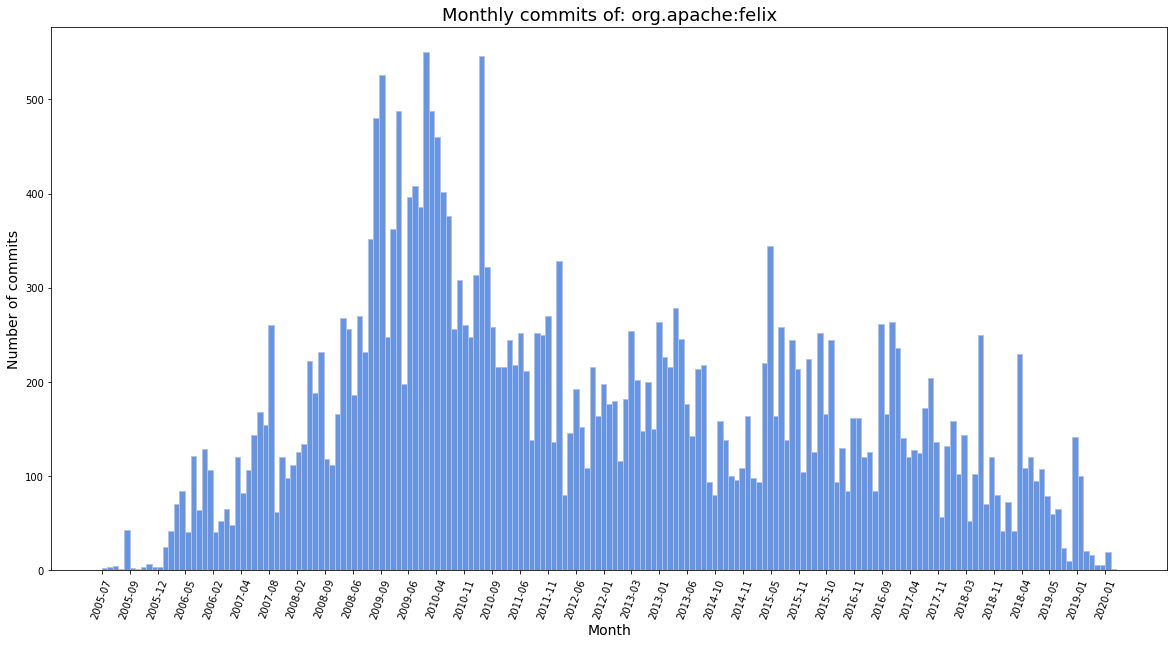

In [22]:
plot_monthly_commits(commits, 'org.apache:felix')

## REFACTORING_MINER

In [23]:
refactoring.shape

(37226, 4)

In [24]:
refactoring.head(3)

,PROJECT_ID,COMMIT_HASH,REFACTORING_TYPE,REFACTORING_DETAIL
0,org.apache:batik,adbabd6f8adad3f9df936a5d61bc2984006d0666,Move Class,Move Class\torg.apache.batik.util.XMLConstants...
1,org.apache:batik,23df647cf944b6c33ab23f0433305c153e247839,Move Class,Move Class\torg.w3c.dom.events.CustomEvent mov...
2,org.apache:batik,23df647cf944b6c33ab23f0433305c153e247839,Move Class,Move Class\torg.w3c.dom.events.KeyboardEvent m...


In [25]:
sum(refactoring.duplicated())

126

In [26]:
# PROJECT_ID column
print('data type:', refactoring.PROJECT_ID.dtype, '\n')
print('number of distinct PROJECT_ID:', len(refactoring.PROJECT_ID.unique()),'\n')
print('number of null values in the column:', sum(refactoring.PROJECT_ID.isnull()),'\n')
print('Examples and count of PROJECT_ID:\n', refactoring.PROJECT_ID.value_counts()[:5], '\n', sep = '')  
print(sum(refactoring.PROJECT_ID.isin(commits.PROJECT_ID))/len(refactoring)*100, '% are contained in commits dataframe')

data type: object 

number of distinct PROJECT_ID: 31 

number of null values in the column: 0 

Examples and count of PROJECT_ID:
org.apache:felix          6610
org.apache:cocoon         3447
org.apache:httpcore       3435
org.apache:batik          3117
org.apache:collections    2663
Name: PROJECT_ID, dtype: int64

100.0 % are contained in commits dataframe


In [27]:
# COMMIT_HASH column
print('data type:', refactoring.COMMIT_HASH.dtype, '\n')
print('number of distinct COMMIT_HASH:', len(refactoring.COMMIT_HASH.unique()),'\n')
print('number of null values in the column:', sum(refactoring.COMMIT_HASH.isnull()),'\n')
print('Examples and count of COMMIT_HASH:\n', refactoring.COMMIT_HASH.value_counts()[:5], '\n', sep = '')  
print(sum(refactoring.COMMIT_HASH.isin(commits.COMMIT_HASH))/len(refactoring)*100, '% are contained in commits dataframe')  # why aren't all of them???

data type: object 

number of distinct COMMIT_HASH: 8228 

number of null values in the column: 0 

Examples and count of COMMIT_HASH:
dc86ba043d4d466fb7f39e9d1a71d9f9aca94ff4    534
0cc32f7232d1c66121554cc65e1cfa54c1549c54    502
d522432b79044740831a132d8b92e7dab5477444    417
16812c91a36cef1d00ea2bded1a2cd98331d543b    290
884baf0ddc6b869d9d4340b6fc9b1ff4d018e7c2    268
Name: COMMIT_HASH, dtype: int64

86.85864718207704 % are contained in commits dataframe


In [28]:
# REFACTORING_TYPE column
print('data type:', refactoring.REFACTORING_TYPE.dtype, '\n')
print('number of distinct REFACTORING_TYPE:', len(refactoring.REFACTORING_TYPE.unique()),'\n')
print('number of null values in the column:', sum(refactoring.REFACTORING_TYPE.isnull()),'\n')
print('Examples and count of REFACTORING_TYPE:\n', refactoring.REFACTORING_TYPE.value_counts()[:5], '\n', sep = '')  

data type: object 

number of distinct REFACTORING_TYPE: 30 

number of null values in the column: 0 

Examples and count of REFACTORING_TYPE:
Move Class        7481
Rename Method     5460
Extract Method    4604
Move Method       2783
Move Attribute    2693
Name: REFACTORING_TYPE, dtype: int64



In [29]:
# REFACTORING_DETAIL column
print('data type:', refactoring.REFACTORING_DETAIL.dtype, '\n')
print('number of distinct REFACTORING_DETAIL:', len(refactoring.REFACTORING_DETAIL.unique()),'\n')
print('number of null values in the column:', sum(refactoring.REFACTORING_DETAIL.isnull()),'\n')
print('Examples of REFACTORING_DETAIL:\n', refactoring.REFACTORING_DETAIL[:5], '\n', sep = '')  

data type: object 

number of distinct REFACTORING_DETAIL: 33096 

number of null values in the column: 0 

Examples of REFACTORING_DETAIL:
0    Move Class\torg.apache.batik.util.XMLConstants...
1    Move Class\torg.w3c.dom.events.CustomEvent mov...
2    Move Class\torg.w3c.dom.events.KeyboardEvent m...
3    Move Class\torg.w3c.dom.events.MutationNameEve...
4    Move Class\torg.w3c.dom.events.TextEvent moved...
Name: REFACTORING_DETAIL, dtype: object



## SZZ_FAULT_INDUCING_COMMITS

In [30]:
faults.shape

(52428, 3)

In [31]:
faults.head(3)

,PROJECT_ID,FAULT_FIXING_COMMIT_HASH,FAULT_INDUCING_COMMIT_HASH
0,org.apache:archiva,fa3688a693bc10bf53e72965027a82df0a8ad267,b7c003acb6b2c2a930443c511cb087d2776b4891
1,org.apache:archiva,d4c85abfac8d0920549f20735caf0e4028149c5c,5f9755b5ae526a83ecdd219401c97498b223b776
2,org.apache:archiva,d4c85abfac8d0920549f20735caf0e4028149c5c,9e37277c4a5d4c353f71ec5060951c554f20bab5


In [32]:
# PROJECT_ID column
print('data type:', faults.PROJECT_ID.dtype, '\n')
print('number of distinct PROJECT_ID:', len(faults.PROJECT_ID.unique()),'\n')
print('number of null values in the column:', sum(faults.PROJECT_ID.isnull()),'\n')
print('Examples and count of PROJECT_ID:\n', faults.PROJECT_ID.value_counts()[:5], '\n', sep = '')  
print(sum(faults.PROJECT_ID.isin(commits.PROJECT_ID))/len(faults)*100, '% are contained in commits dataframe')

data type: object 

number of distinct PROJECT_ID: 28 

number of null values in the column: 0 

Examples and count of PROJECT_ID:
org.apache:felix        16183
org.apache:thrift        9331
org.apache:zookeeper     7377
org.apache:cayenne       2990
org.apache:archiva       2862
Name: PROJECT_ID, dtype: int64

100.0 % are contained in commits dataframe


In [33]:
# FAULT_FIXING_COMMIT_HASH column
print('data type:', faults.FAULT_FIXING_COMMIT_HASH.dtype, '\n')
print('number of distinct COMMIT_HASH:', len(faults.FAULT_FIXING_COMMIT_HASH.unique()),'\n')
print('number of null values in the column:', sum(faults.FAULT_FIXING_COMMIT_HASH.isnull()),'\n')
print('Examples and count of COMMIT_HASH:\n', faults.FAULT_FIXING_COMMIT_HASH.value_counts()[:5], '\n', sep = '')  
print(sum(faults.FAULT_FIXING_COMMIT_HASH.isin(commits.COMMIT_HASH))/len(faults)*100, '% are contained in commits dataframe')

data type: object 

number of distinct COMMIT_HASH: 7123 

number of null values in the column: 0 

Examples and count of COMMIT_HASH:
412c7bb1ede09d81e9a2125542439a762ba1c501    369
2be06d62b2626dea132d6eb891e6242983dfd16b    353
777b1d6501e6a1e54d1afd59be50eb188a05c216    268
17f229020f24ab34c553ef619f11834ae6882b21    196
291a35ef8be015be252664e2cbde0af741cd82f1    174
Name: FAULT_FIXING_COMMIT_HASH, dtype: int64

100.0 % are contained in commits dataframe


In [34]:
# FAULT_INDUCING_COMMIT_HASH column
print('data type:', faults.FAULT_INDUCING_COMMIT_HASH.dtype, '\n')
print('number of distinct COMMIT_HASH:', len(faults.FAULT_INDUCING_COMMIT_HASH.unique()),'\n')
print('number of null values in the column:', sum(faults.FAULT_INDUCING_COMMIT_HASH.isnull()),'\n')
print('Examples and count of COMMIT_HASH:\n', faults.FAULT_INDUCING_COMMIT_HASH.value_counts()[:5], '\n', sep = '')  
print(sum(faults.FAULT_INDUCING_COMMIT_HASH.isin(commits.COMMIT_HASH))/len(faults)*100, '% are contained in commits dataframe')

data type: object 

number of distinct COMMIT_HASH: 17326 

number of null values in the column: 0 

Examples and count of COMMIT_HASH:
fc186f50392bf8c804b1d314971c92efa5f52fc3    204
16a23a6618754a5a87aeb8df99a72516b0272fb3    154
930feccd2f2f96e3ff14e0ad327c352d7a2cfdfd    111
ffce83512370e970426f7f6b7cff8f519de59bd4    106
0a81c16c4c921ef52179b943dd046fc72022ccc6     99
Name: FAULT_INDUCING_COMMIT_HASH, dtype: int64

100.0 % are contained in commits dataframe


## GIT_COMMITS_CHANGES

In [35]:
commits_changes.head()

,PROJECT_ID,FILE,COMMIT_HASH,DATE,COMMITTER_ID,LINES_ADDED,LINES_REMOVED,NOTE
0,org.apache:archiva,pom.xml,2b6be811c1d4f5e81339616208530d486608e42b,2005-11-28 03:15:35+00:00,Brett Porter,223,0,repository manager - root POM git-svn-id: ht...
1,org.apache:archiva,pom.xml,af0ddbcfc1e8c2528decbd458f42e16cbcae5051,2005-11-28 04:50:31+00:00,Brett Porter,5,1,update reports git-svn-id: https://svn.apach...
2,org.apache:archiva,pom.xml,ea640e1803a8535ebfba2ade4ea9272b240067e8,2005-11-29 01:34:22+00:00,Brett Porter,25,0,move discovery to a new component PR: MRM-9 ...
3,org.apache:archiva,AbstractArtifactDiscoverer.java,ea640e1803a8535ebfba2ade4ea9272b240067e8,2005-11-29 01:34:22+00:00,Brett Porter,103,0,move discovery to a new component PR: MRM-9 ...
4,org.apache:archiva,ArtifactDiscoverer.java,ea640e1803a8535ebfba2ade4ea9272b240067e8,2005-11-29 01:34:22+00:00,Brett Porter,60,0,move discovery to a new component PR: MRM-9 ...


In [36]:
commits_changes['NOTE'][0]

'repository manager - root POM   git-svn-id: https://svn.apache.org/repos/asf/maven/repository-manager/trunk@349352 13f79535-47bb-0310-9956-ffa450edef68'

In [37]:
# COMMIT_HASH column
print('data type:', commits_changes.COMMIT_HASH.dtype, '\n')
print('number of distinct COMMIT_HASH:', len(commits_changes.COMMIT_HASH.unique()),'\n')
print('number of null values in the column:', sum(commits_changes.COMMIT_HASH.isnull()),'\n')
print('Examples and count of COMMIT_HASH:\n', commits_changes.COMMIT_HASH.value_counts()[:5], '\n', sep = '')  
print(sum(commits_changes.COMMIT_HASH.isin(commits.COMMIT_HASH))/len(commits_changes)*100, '% are contained in commits dataframe')  # why aren't all of them???

data type: object 

number of distinct COMMIT_HASH: 150235 

number of null values in the column: 0 

Examples and count of COMMIT_HASH:
7d56abaf9b4a0e3e30a9afbf94e22f4b78d63bd0    8980
db99150c481c987a11467357e046d6dd60ffa843    6603
9b19b491e7c8c950965f4ff5d0c1027f1cbf7ac8    5658
ba0217ff17501fb849d8999e808d37579db7b4f1    4419
3b98f2d1f9c01d171fb76aedbcf23dc254991d1a    4159
Name: COMMIT_HASH, dtype: int64

100.0 % are contained in commits dataframe


# VISUALIZATIONS

In [38]:
# aggregate commits by project name and number of commits
commits_count = pd.DataFrame(commits[['PROJECT_ID','COMMIT_HASH']].groupby('PROJECT_ID').count()).reset_index().sort_values('COMMIT_HASH', ascending=False)

In [39]:
# aggregate commits by project name and number of commits
refactoring_count = pd.DataFrame(refactoring[['PROJECT_ID','COMMIT_HASH']].groupby('PROJECT_ID').count()).reset_index().sort_values('COMMIT_HASH', ascending=False)

In [40]:
# aggregate faults by project name and number of commits
faults_count = pd.DataFrame(faults[['PROJECT_ID','FAULT_FIXING_COMMIT_HASH']].groupby('PROJECT_ID').count()).reset_index().sort_values('FAULT_FIXING_COMMIT_HASH', ascending=False)

In [41]:
faults_count.head()

,PROJECT_ID,FAULT_FIXING_COMMIT_HASH
18,org.apache:felix,16183
24,org.apache:thrift,9331
27,org.apache:zookeeper,7377
4,org.apache:cayenne,2990
0,org.apache:archiva,2862


In [42]:
counts = commits_count.merge(refactoring_count, on = 'PROJECT_ID', suffixes = ['_commits','_refactorings']).merge(faults_count, on = 'PROJECT_ID')
counts.rename(columns = {'COMMIT_HASH_commits':'commits','COMMIT_HASH_refactorings':'refactorings','FAULT_FIXING_COMMIT_HASH':'faults'}, inplace=True)

In [43]:
counts.head(3)

,PROJECT_ID,commits,refactorings,faults
0,org.apache:felix,30470,6610,16183
1,org.apache:cocoon,26321,3447,401
2,org.apache:archiva,8695,1594,2862


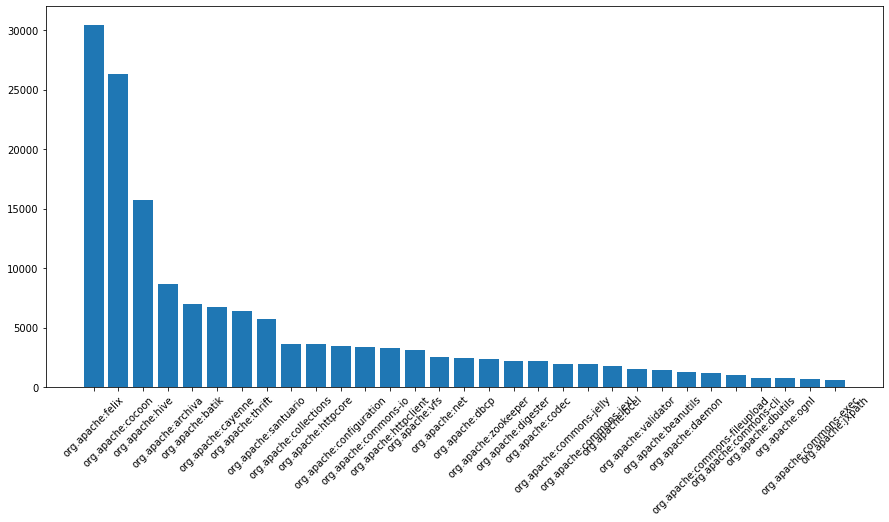

In [44]:
plt.figure(figsize=(15,7))
plt.bar(commits_count.PROJECT_ID, commits_count.COMMIT_HASH)
plt.xticks(rotation=45)
plt.show()

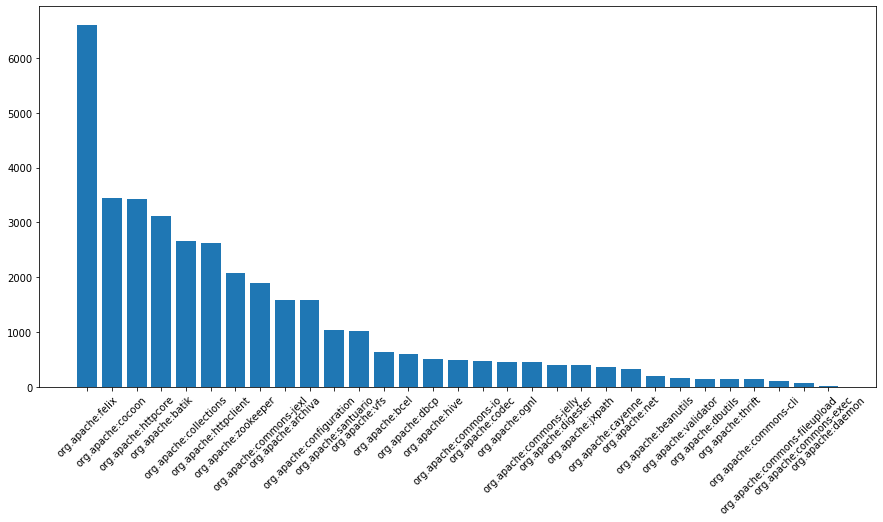

In [45]:
plt.figure(figsize=(15,7))
plt.bar(refactoring_count.PROJECT_ID, refactoring_count.COMMIT_HASH)
plt.xticks(rotation=45)
plt.show()

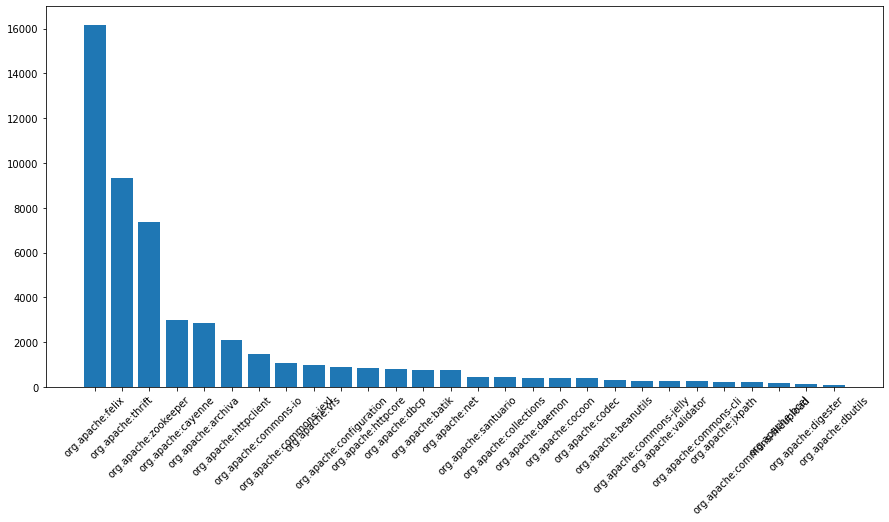

In [46]:
plt.figure(figsize=(15,7))
plt.bar(faults_count.PROJECT_ID, faults_count.FAULT_FIXING_COMMIT_HASH)
plt.xticks(rotation=45)
plt.show()

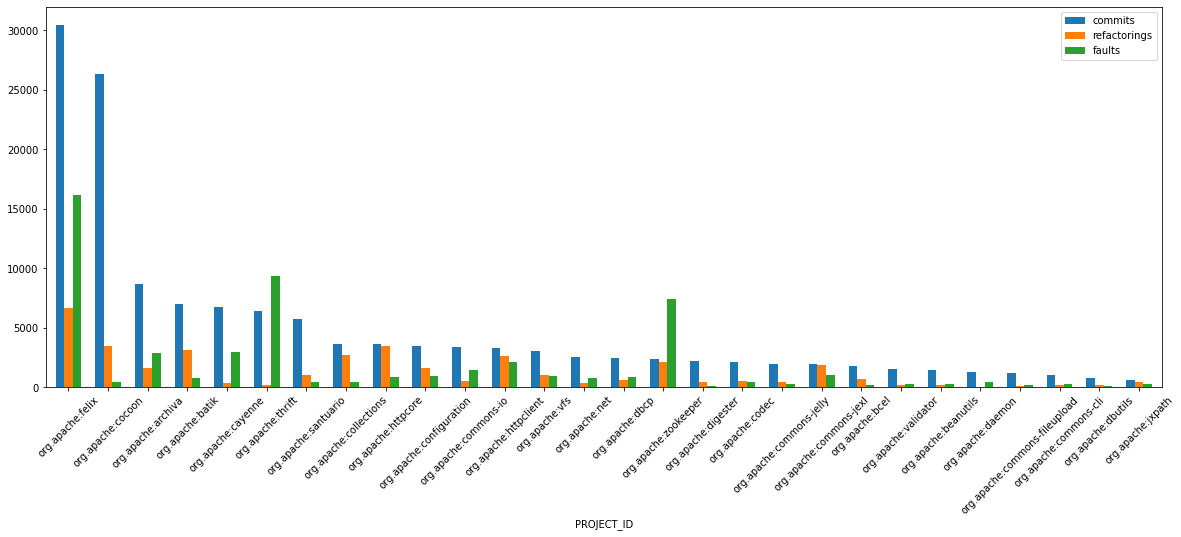

In [47]:
counts.set_index('PROJECT_ID').plot(kind='bar', figsize=(20,7), rot=45, width=0.65)
plt.show()

In [48]:
counts.head()

,PROJECT_ID,commits,refactorings,faults
0,org.apache:felix,30470,6610,16183
1,org.apache:cocoon,26321,3447,401
2,org.apache:archiva,8695,1594,2862
3,org.apache:batik,7015,3117,775
4,org.apache:cayenne,6733,362,2990


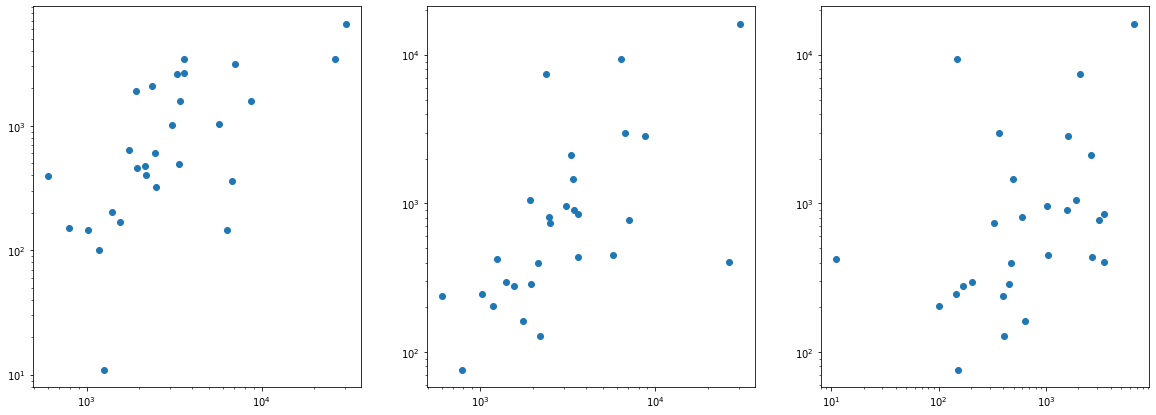

In [49]:
plt.figure(figsize=(20,7))
plt.subplot(1, 3, 1)
plt.scatter(counts.commits, counts.refactorings, label = "label_name" )
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.subplot(1, 3, 2)
plt.scatter(counts.commits, counts.faults, label = "label_name" )
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.subplot(1, 3, 3)
plt.scatter(counts.refactorings, counts.faults, label = "label_name" )
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
# add a plot looking for the relative measures: refactorings/commits - faults

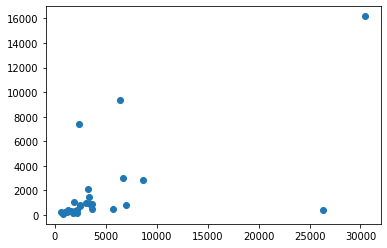

In [50]:
plt.scatter(counts.commits, counts.faults, label = "label_name" )